# Home Mortgage Approval MLP Classifier

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

plt.rcParams["font.size"] = 16

In [2]:
# reading in csv
df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")
df['income'] = df['income'].multiply(1000)

/var/folders/8v/8twy7p3n3m535t9m_htmk0h00000gn/T/ipykernel_7496/902865886.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")


In [3]:
# selecting appropiate columns for ML model
needed_cols = ["action_taken", "purchaser_type", "preapproval", "loan_type", "loan_purpose",
               "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
               "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
               "applicant_credit_score_type"]
 
modified_df = df[needed_cols]
modified_df = modified_df.dropna()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205118 entries, 1203 to 282624
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken                    205118 non-null  int64  
 1   purchaser_type                  205118 non-null  int64  
 2   preapproval                     205118 non-null  int64  
 3   loan_type                       205118 non-null  int64  
 4   loan_purpose                    205118 non-null  int64  
 5   business_or_commercial_purpose  205118 non-null  int64  
 6   loan_amount                     205118 non-null  float64
 7   loan_to_value_ratio             205118 non-null  object 
 8   interest_rate                   205118 non-null  object 
 9   hoepa_status                    205118 non-null  int64  
 10  property_value                  205118 non-null  object 
 11  occupancy_type                  205118 non-null  int64  
 12  income            

In [4]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].replace('Exempt', 8888)
modified_df['interest_rate'] = modified_df['interest_rate'].replace('Exempt', 8888)
modified_df['property_value'] = modified_df['property_value'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('20%-<30%', 25)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('30%-<36%', 33)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('<20%', 15)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('50%-60%', 55)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('>60%', 65)


In [5]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].astype(float)
modified_df['interest_rate'] = modified_df['interest_rate'].astype(float)
modified_df['property_value'] = modified_df['property_value'].astype(float)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].astype(float)

In [6]:
modified_df['action_taken'] = modified_df['action_taken'].replace([1,2,3], [1,1,0])

In [7]:
modified_df = modified_df.reset_index(drop=True)
modified_df.head()

,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,hoepa_status,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type
0,1,71,2,1,1,2,405000.0,80.0,7.125,2,505000.0,3,116000.0,42.0,1
1,1,71,2,2,1,2,155000.0,96.5,3.500,2,165000.0,1,67000.0,43.0,1
2,1,1,2,1,1,2,175000.0,68.0,4.875,2,255000.0,1,66000.0,33.0,2
3,1,1,2,1,1,2,475000.0,80.0,4.625,2,595000.0,1,214000.0,15.0,9
4,1,71,2,2,1,2,335000.0,96.5,3.875,2,335000.0,1,84000.0,44.0,3


In [8]:
features = ["purchaser_type", "preapproval", "loan_type", "loan_purpose",
            "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
            "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
            "applicant_credit_score_type"]
X = modified_df[features]
y = np.array(modified_df['action_taken'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

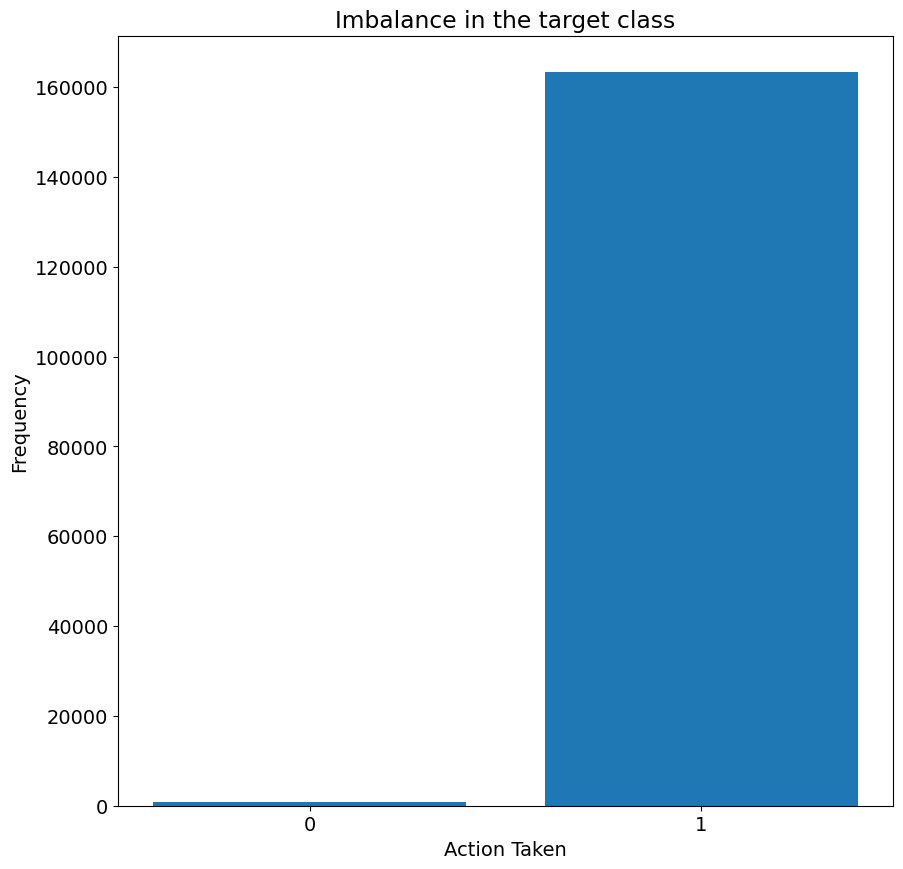

In [21]:
plt.figure(figsize=(10,10))
y_train_unique, counts = np.unique(y_train, return_counts=True)
plt.bar(y_train_unique, counts)
plt.xlabel("Action Taken")
plt.ylabel("Frequency")
plt.xticks([0,1])
plt.title("Imbalance in the target class")
plt.show()

In [11]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

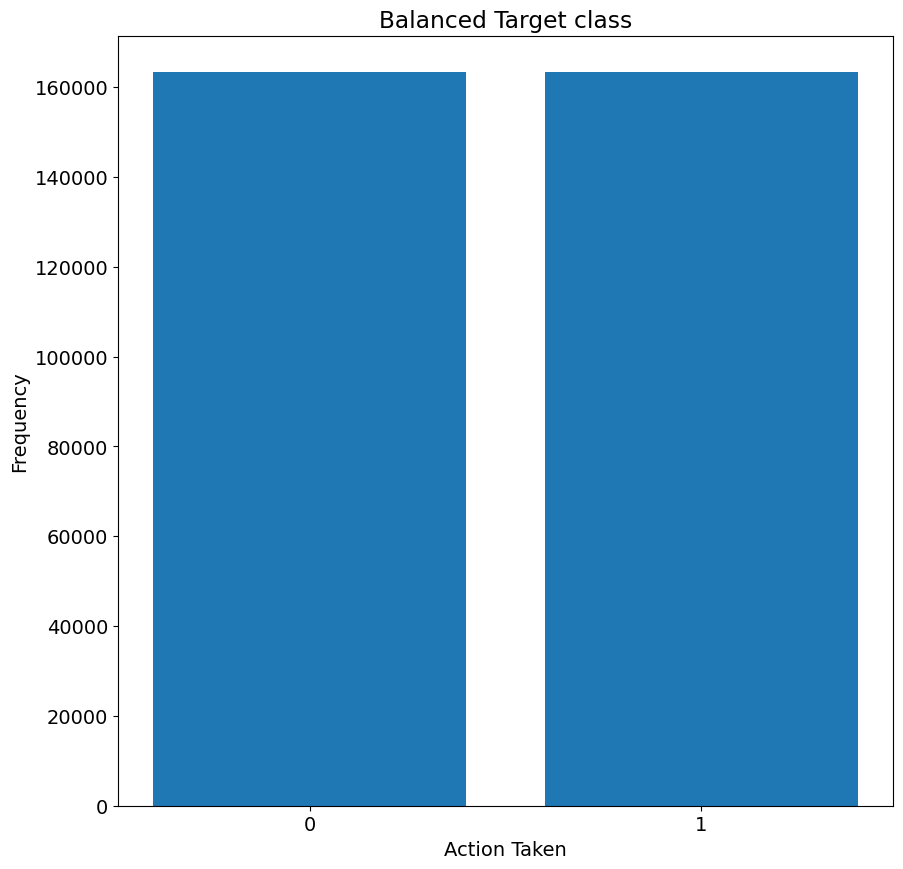

In [20]:
plt.figure(figsize=(10,10))
y_resampled_unique, counts = np.unique(y_resampled, return_counts=True)
plt.bar(y_resampled_unique, counts)
plt.xlabel("Action Taken")
plt.ylabel("Frequency")
plt.xticks([0,1])
plt.title("Balanced Target class")
plt.show()

### MLP Classifer

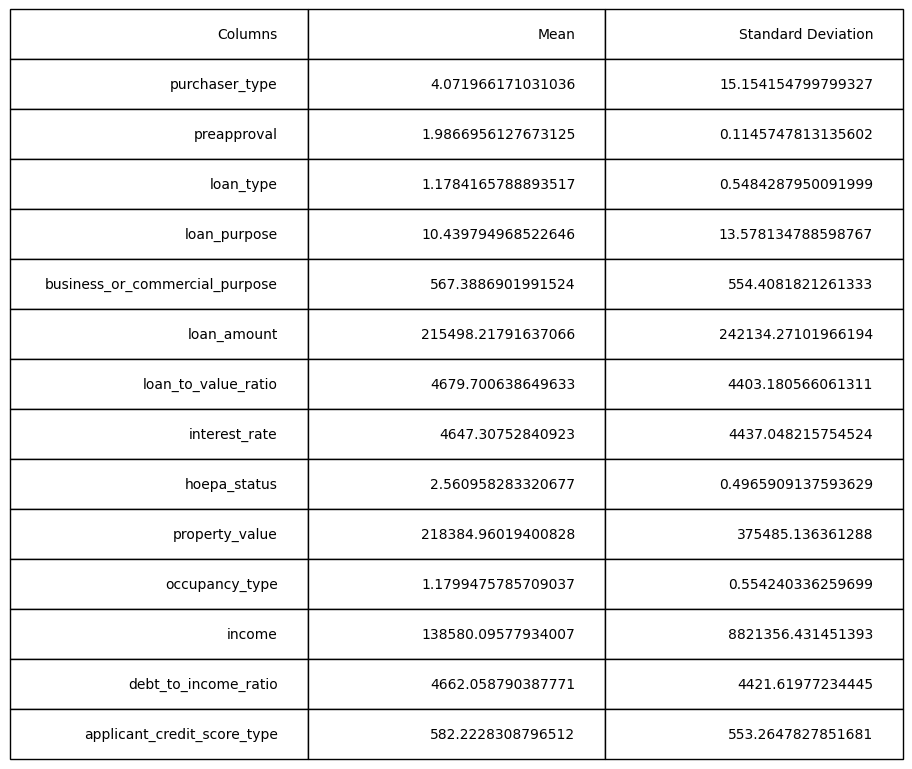

In [40]:
data = []
columns = ("Columns", "Mean", "Standard Deviation")
for column in features:
    cdf = np.array(X_resampled[column])
    mean = np.mean(cdf)
    sdev = np.std(cdf)
    data.append([column, mean, sdev])
    #print(f"{column:{24}} {mean:{15}.2f} {sdev:{15}.2f}")

table = plt.table(cellText=data,
                colLabels=columns,
                colLoc="right",
                loc="center")
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
table.scale(1.8, 3)

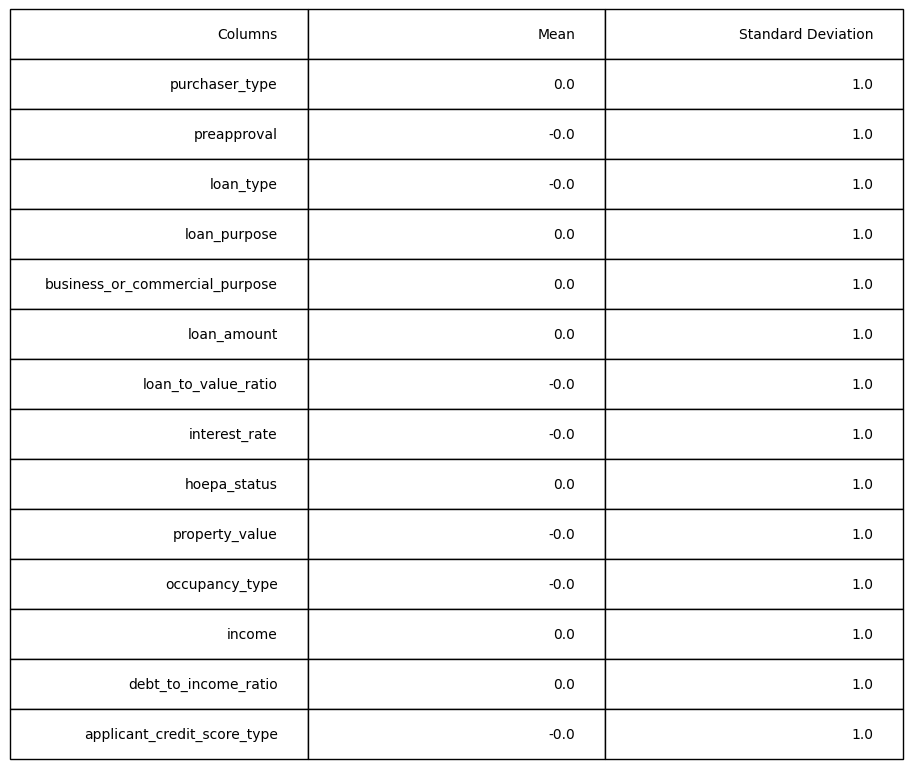

In [39]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_train_transform = scaler.transform(X_resampled)
X_test_transform = scaler.transform(X_test)

data = []
for i in range(len(features)):
    cdf = np.array(X_train_transform[:, i])
    mean = round(np.mean(cdf), 2)
    sdev = round(np.std(cdf), 2)
    data.append([features[i], mean, sdev])
    #print(f"{column_names[i]:{24}} {mean:{15}.2f} {sdev:{15}.2f}")

table = plt.table(cellText=data,
                colLabels=columns,
                colLoc="right",
                loc="center")
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
table.scale(1.8, 3)

In [15]:
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train_transform, y_resampled, random_state=42, test_size=0.125)

In [16]:
num_neurons = [50, 100, 200, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]

matrix = []
for nn in num_neurons:
    cur_row = []
    for lr in learning_rate:
        clf = MLPClassifier(hidden_layer_sizes=(nn,), learning_rate_init=lr, activation='tanh', solver='sgd', random_state=42)
        clf.fit(X_subtrain, y_subtrain)
        y_predict = clf.predict(X_val)
        ac_score = accuracy_score(y_val, y_predict)
        print(ac_score)
        cur_row.append(ac_score)
    matrix.append(cur_row)

0.9927491855081694
0.9927491855081694
0.9928716654826936
0.9929206574725032
0.993116625431742
0.9927491855081694
0.9927491855081694
0.9928471694877887
0.9928961614775984
0.9930921294368371
0.9927491855081694
0.9927491855081694
0.992798177497979
0.9928961614775984
0.9928716654826936
0.992798177497979
0.992798177497979
0.992798177497979
0.9928716654826936
0.992798177497979


Text(0.5, 1.0, 'Validation Accuracy')

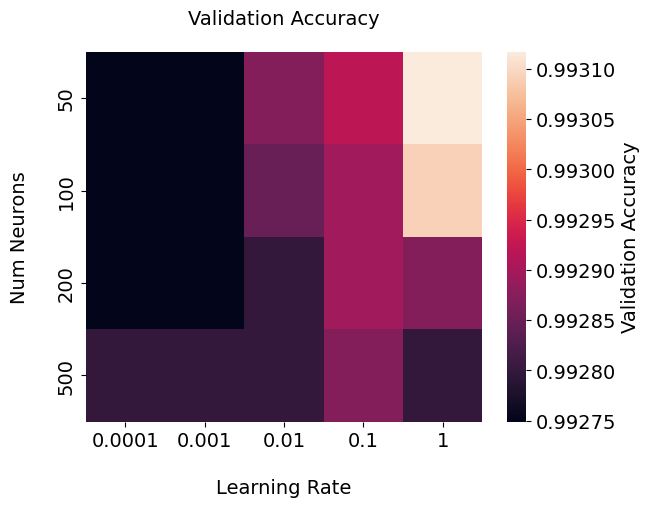

In [17]:
ax = sns.heatmap(matrix, cbar_kws={'label': 'Validation Accuracy'})
ax.set_xlabel("Learning Rate", labelpad=20)
ax.xaxis.set_ticklabels(learning_rate)
ax.set_ylabel("Num Neurons", labelpad=20)
ax.yaxis.set_ticklabels(num_neurons)
ax.set_title("Validation Accuracy", fontsize=14, pad=20)

In [16]:
network_combinations = [(100), (100, 100), (100, 100, 100), (200), (200,100), (200,100,100), (500), (500,200), (500,200,100)]

for nc in network_combinations:
    clf = MLPClassifier(hidden_layer_sizes=nc, learning_rate_init=1, activation='tanh', solver='sgd', random_state=42)
    clf.fit(X_subtrain, y_subtrain)
    y_predict = clf.predict(X_val)
    print(nc, accuracy_score(y_val, y_predict))

100 0.9930921294368371
(100, 100) 0.9921122896406438
(100, 100, 100) 0.9782720525194131
200 0.9928716654826936
(200, 100) 0.9789579403767484
(200, 100, 100) 0.9782965485143179
500 0.992798177497979
(500, 200) 0.992798177497979
(500, 200, 100) 0.9904220659922103


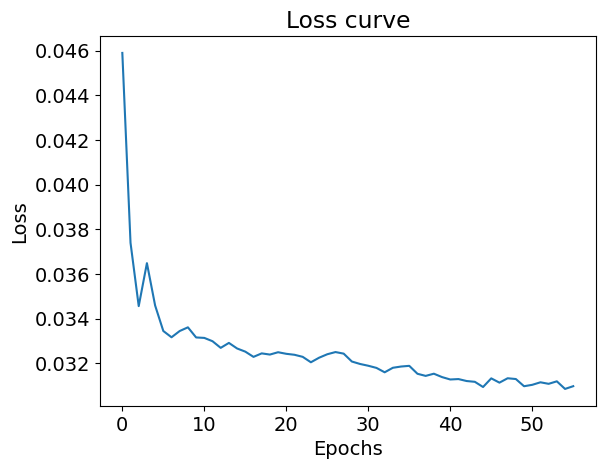

In [17]:
clf = MLPClassifier(hidden_layer_sizes=100, learning_rate_init=1, random_state=42, activation='tanh', solver='sgd')
clf.fit(X_train_transform, y_resampled)
y_predict_train = clf.predict(X_train_transform)
y_predict = clf.predict(X_test_transform)
lcurve = clf.loss_curve_
plt.plot(lcurve)
plt.title(f'Loss curve')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
cm_train = confusion_matrix(y_resampled, y_predict_train)
cm = confusion_matrix(y_test, y_predict)

In [18]:
train_ac_score = accuracy_score(y_resampled, y_predict_train)
test_ac_score = accuracy_score(y_test, y_predict)
print(f"Training Accuracy {train_ac_score}")
print(f'Testing Accuracy {test_ac_score}')

Training Accuracy 0.9931013154349264
Testing Accuracy 0.9875438767550702


In [42]:
print(f1_score(y_test, y_predict))

0.9936990591745891


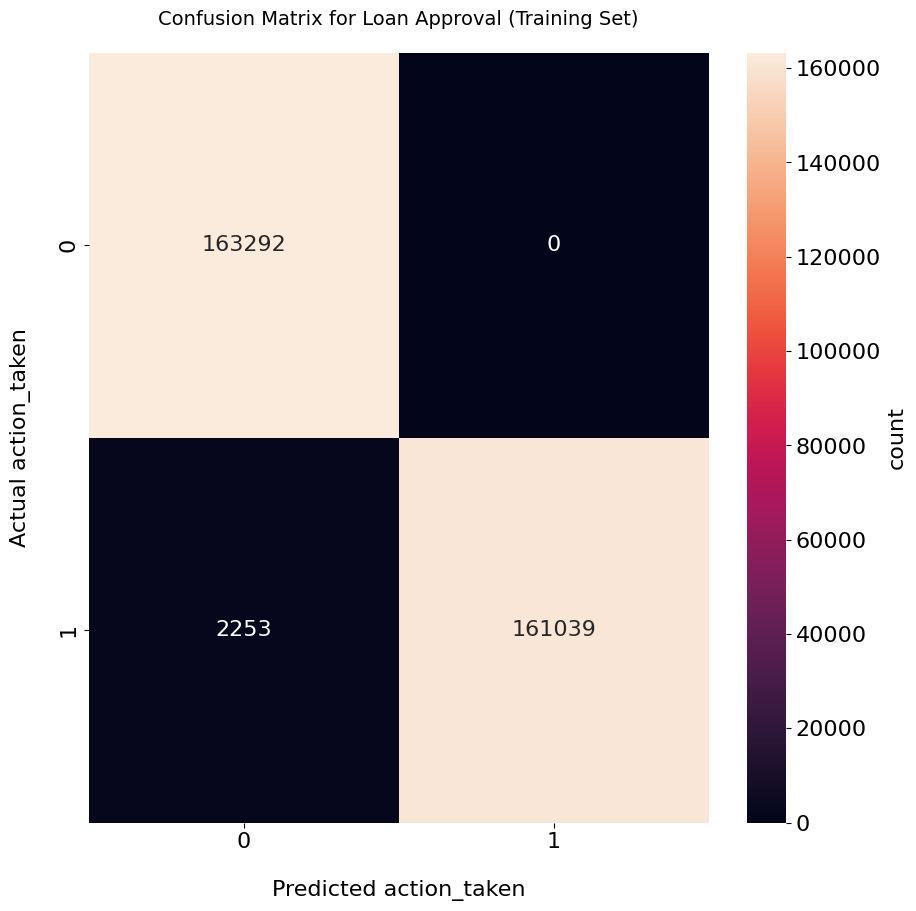

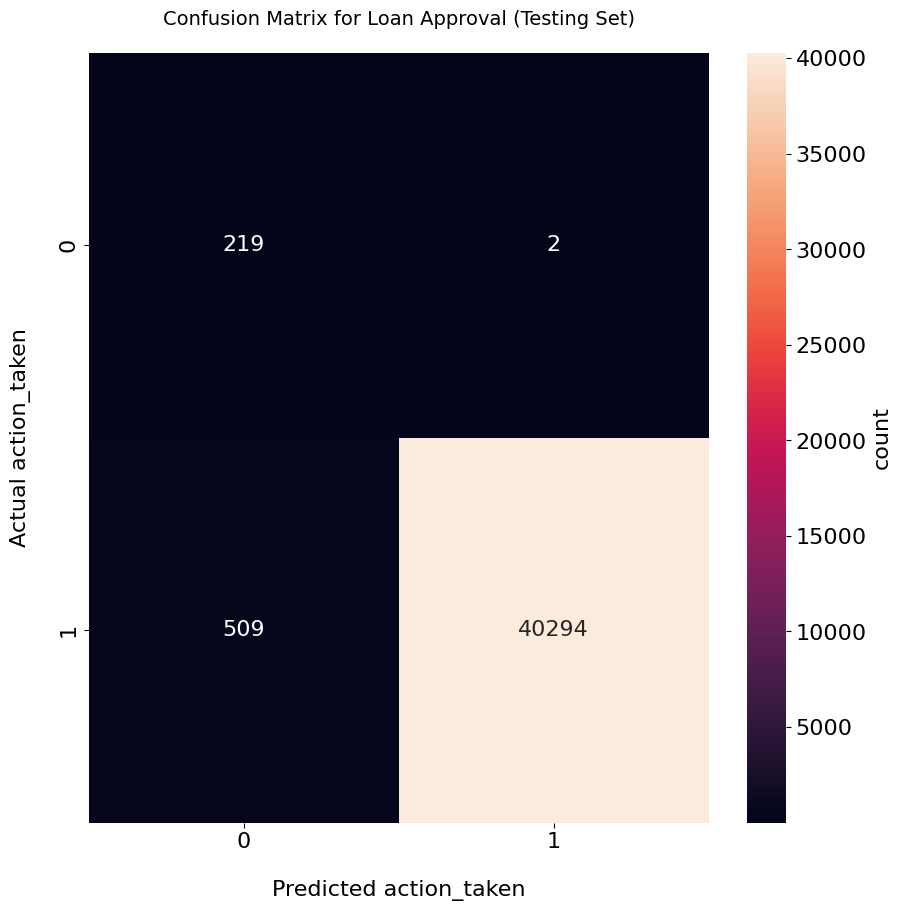

In [44]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm_train, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Training Set)", fontsize=14, pad=20)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Testing Set)", fontsize=14, pad=20)
plt.show()